# Shubham Agrawal 

# Objective
To predict the optimum number of clusters from **'IRIS'** dataset and represent it visually.

### Introduction

We will use **K-means clustering algorithm** to make clusters and **Elbow curve** to determine the optimum number of clusters

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# loading and reading the data
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**No NULL values**

In [6]:
# dropping id column as it is not required
df.drop(columns=['Id'], inplace=True)
 

In [29]:
df=df.drop(columns=['Species'])

### Feature Scaling

As Kmeans Algorithm are distance based algorithm in n-dimensional space, the whole data need to be *standardized*.

In [31]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled=ss.fit_transform(df)

In [32]:
# scaled data
scaled_df=pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


pandas.core.frame.DataFrame

In [44]:
x=scaled_df.iloc[:,:]

### Model Building
To find the optimum number of clusters we will use *elbow curve*.

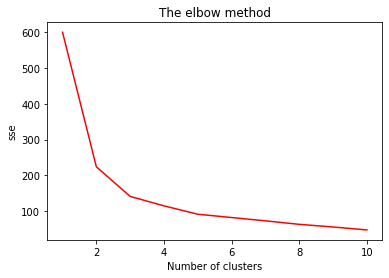

In [33]:
# Finding the optimum number of clusters

# importing the K-means algorithm
from sklearn.cluster import KMeans
sse=[]

for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++',max_iter = 300, random_state=40)
    km.fit(scaled_df)
    sse.append(km.inertia_)

    
plt.plot(range(1, 11), sse, color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

From the ***Elbow Curve***, we can say the optimum number of clusters is **3.**

In [34]:
# Clustering the data with k=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, random_state = 40)
pred = kmeans.fit_predict(scaled_df)

In [35]:
# Assigning the cluster number to each row and creating a new dataframe
scaled_df['Cluster_number']=pred
scaled_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_number
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


### Visualizing

In [1]:
# Visualizing clusters on Sepal Length and Sepal Width 

plt.scatter(x=scaled_df['SepalLengthCm'], y=scaled_df['SepalWidthCm'] ,c=scaled_df['Cluster_number'], label='clusters')

# clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='s', s=100, color='black', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()


NameError: name 'plt' is not defined

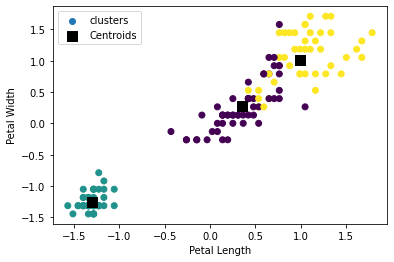

In [39]:
# Visualizing clusters on Petal Length and Petal Width 
plt.scatter(x=scaled_df['PetalLengthCm'], y=scaled_df['PetalWidthCm'] ,c=scaled_df['Cluster_number'], label='clusters')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3], marker='s', s=100, color='black', label='Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

Lets see which of our species are clustered into different cluster

In [11]:
# Merging the species dataframe into with cluster_numbers